# Projek Pertama Predictive Analytics
## Machine Learning Kelas Mahir


---
##### Nama: Rangga Wibisana Putra Pamungkas
---
Projek pertama dari Machine Learning Kelas Mahir ini adalah membuat Model Predictive Analytics.

# Loading Dataset

In [1]:
# Menghubungkan Drive dengan Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"
os.chdir('/content/drive/MyDrive/Kaggle')
!kaggle datasets download -d mrsimple07/laptoppriceprediction

  0% 0.00/39.1k [00:00<?, ?B/s]
100% 39.1k/39.1k [00:00<00:00, 2.64MB/s]


In [3]:
os.chdir('/content')
!mkdir laptop
!unzip -qq /content/drive/MyDrive/Kaggle/laptoppriceprediction.zip  -d laptop
!ls laptop

Laptop_price.csv


In [4]:
# Load dataset sebagai dataframe
import pandas as pd
df = pd.read_csv('/content/laptop/Laptop_price.csv')

# Melihat sampel teratas dataframe
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


# Exploratory Data Analysis
### 1. Deskripsi Variabel

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [6]:
df.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


### 2. Missing Value dan Outliers

In [7]:
df.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

<Axes: xlabel='Processor_Speed'>

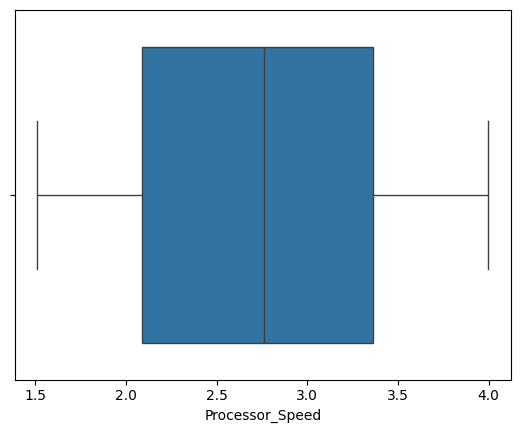

In [8]:
import seaborn as sns
sns.boxplot(x=df['Processor_Speed'])

<Axes: xlabel='Screen_Size'>

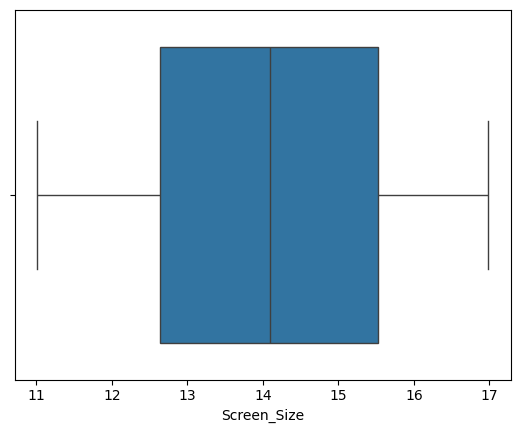

In [9]:
sns.boxplot(x=df['Screen_Size'])

<Axes: xlabel='Weight'>

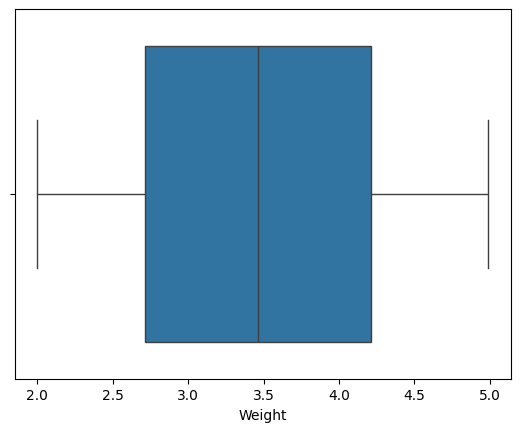

In [10]:
sns.boxplot(x=df['Weight'])

### 3. Univariate Analysis

In [11]:
numerical_features = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight', 'Price']
categorical_features = ['Brand']

        jumlah sampel  persentase
Dell              210        21.0
Asus              206        20.6
Acer              204        20.4
Lenovo            190        19.0
HP                190        19.0


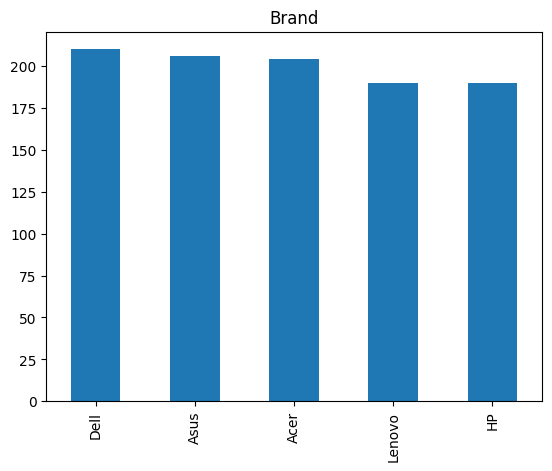

In [12]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
cat_df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(cat_df)
count.plot(kind='bar', title=feature);

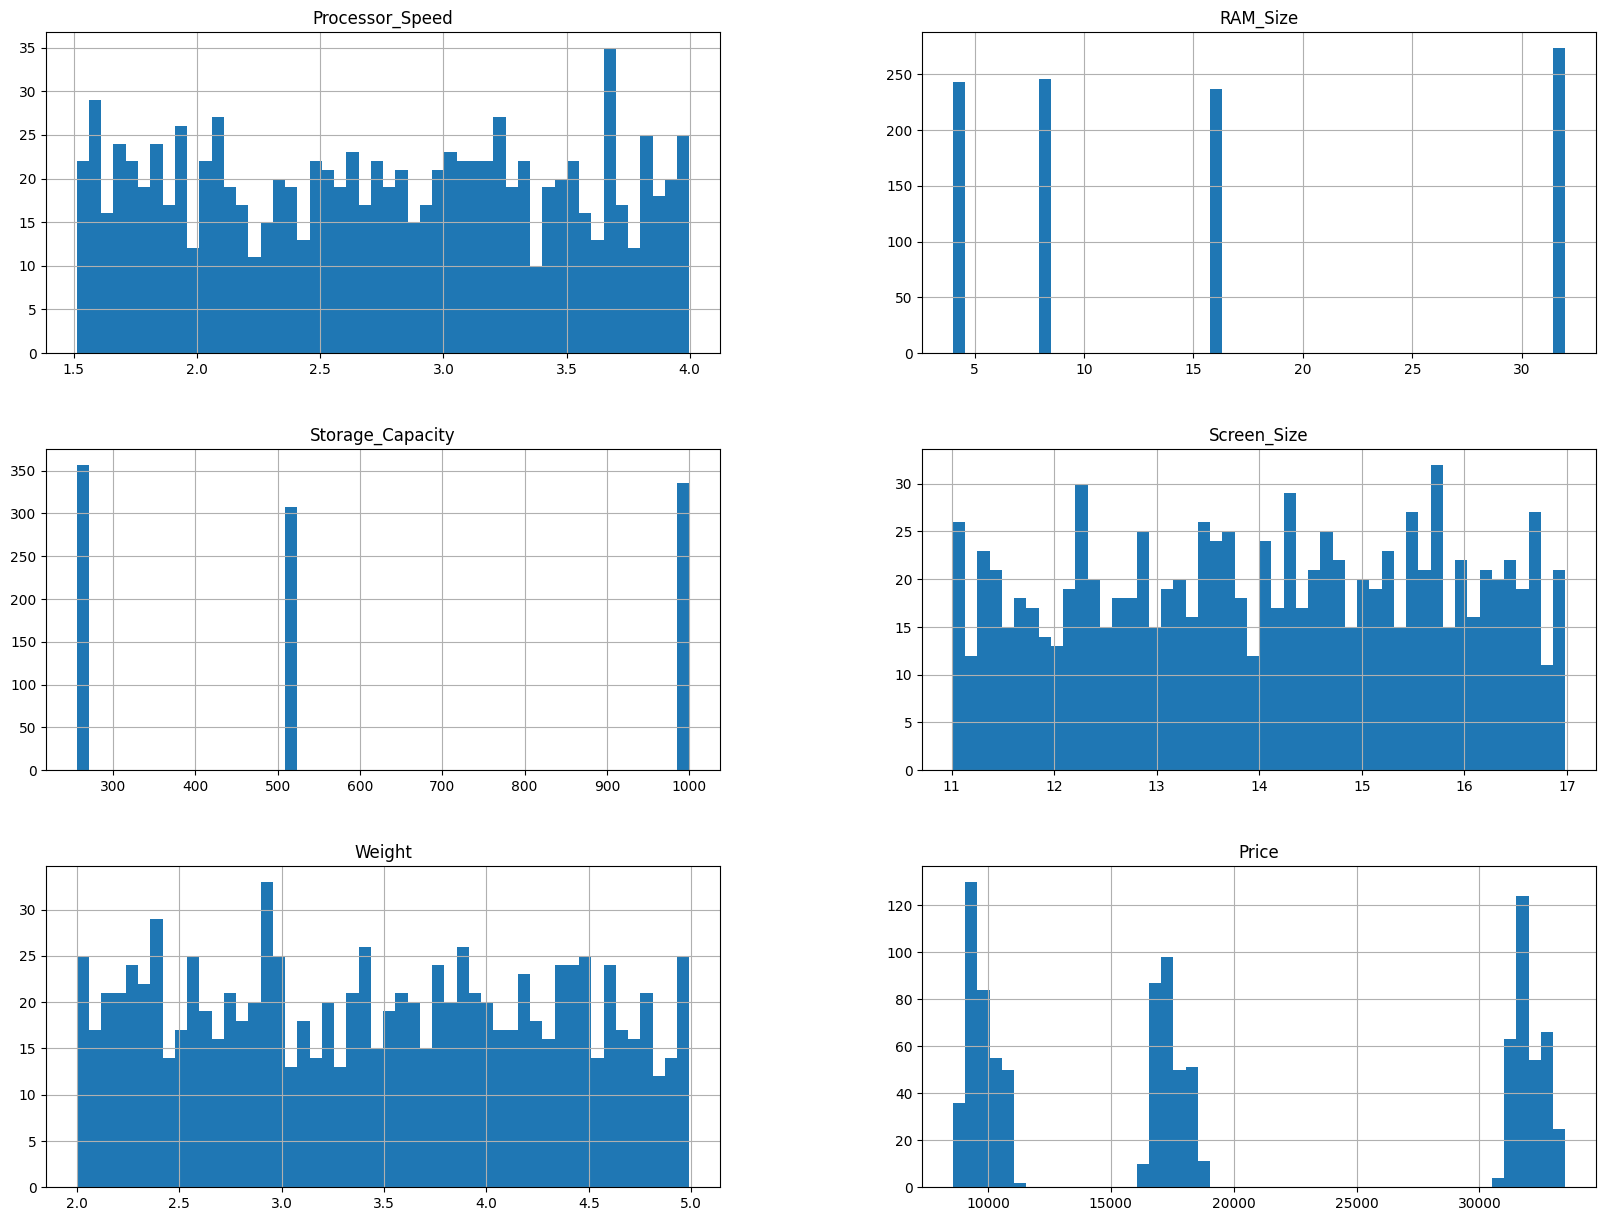

In [13]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

### 4. Multivariate Analysis

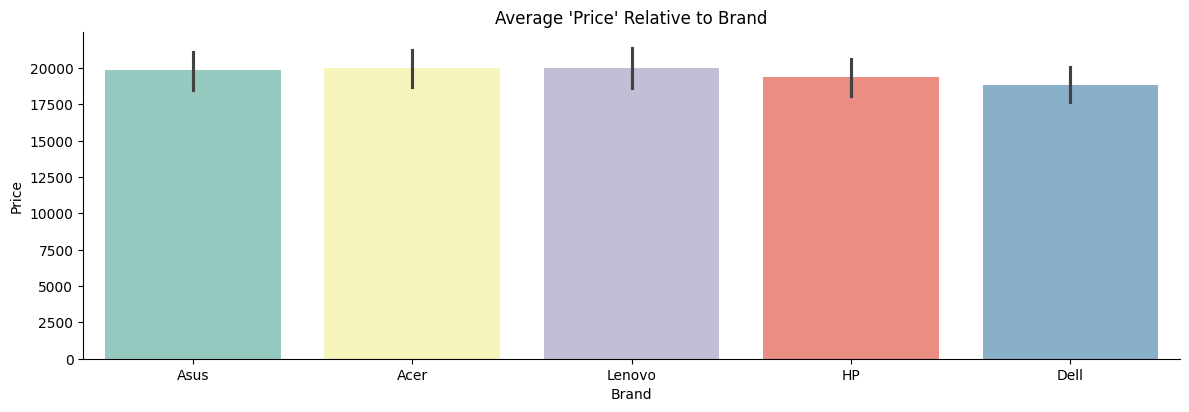

In [14]:
for col in categorical_features:
  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set3", hue="Brand")
  plt.title("Average 'Price' Relative to {}".format(col))
  plt.show()

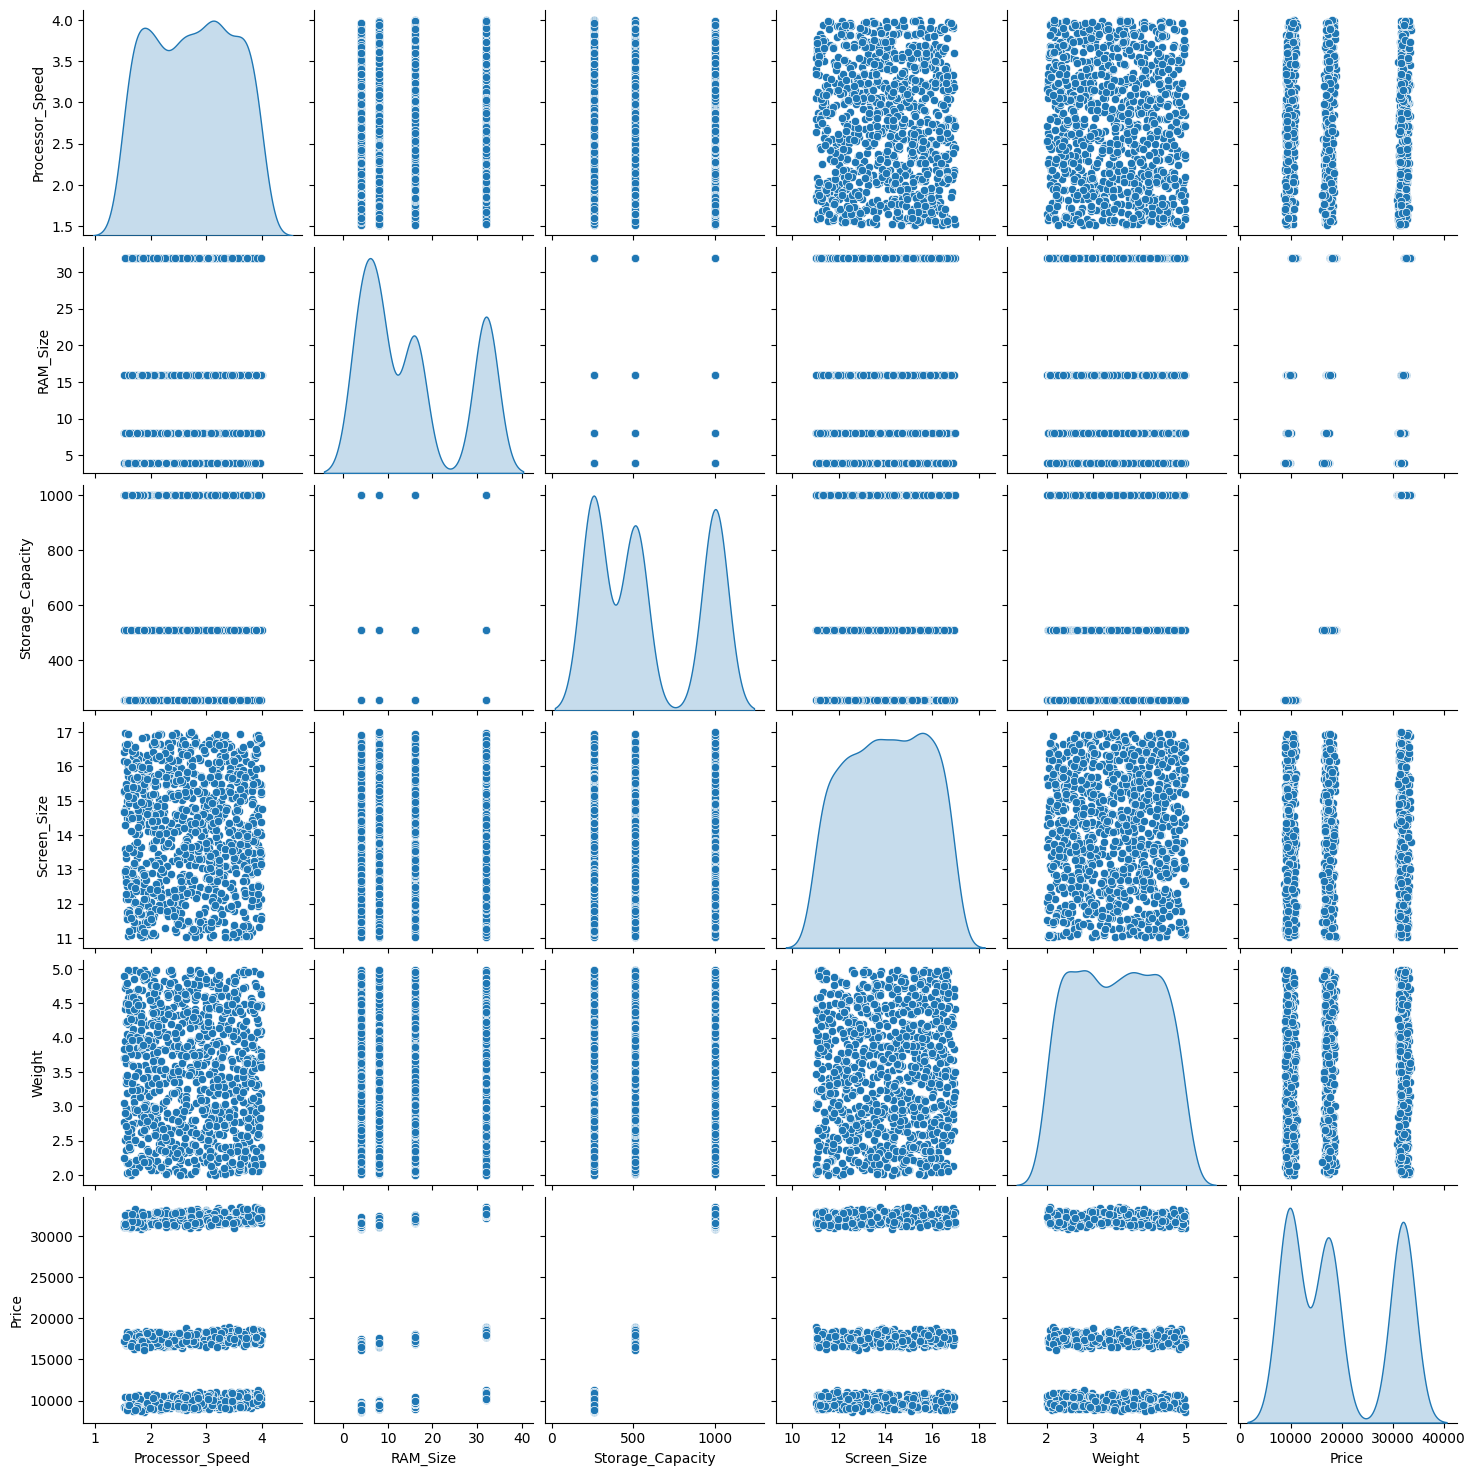

In [15]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

<ipython-input-16-b0df64929d97>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

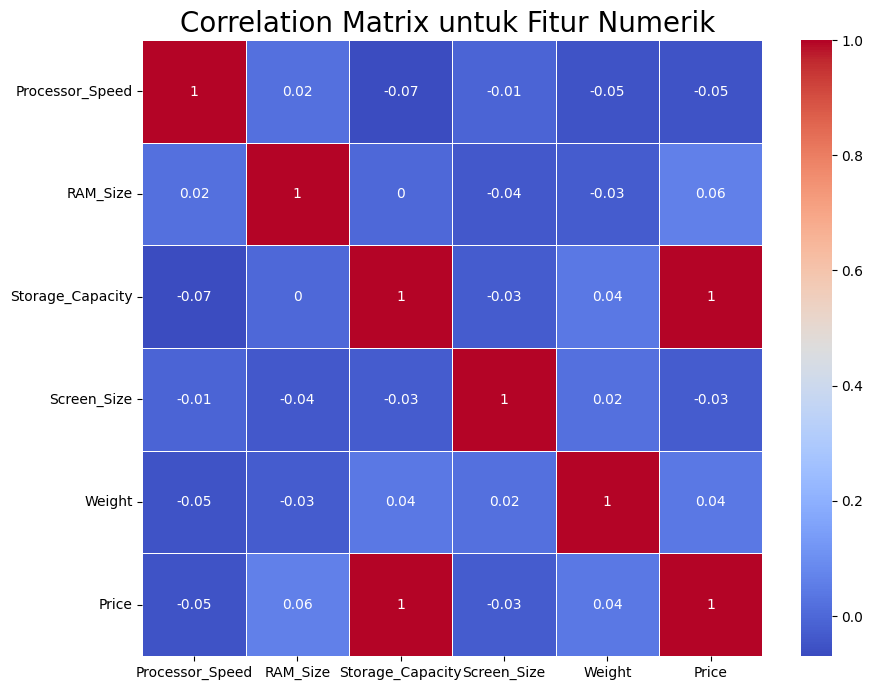

In [16]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# Data Preparation

In [17]:
from sklearn.preprocessing import  OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['Brand'], prefix='Brand')],axis=1)
df.drop(['Brand'], axis=1, inplace=True)
df.head()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Brand_Acer,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo
0,3.830296,16,512,11.185147,2.641094,17395.093065,0,1,0,0,0
1,2.912833,4,1000,11.311372,3.260012,31607.605919,1,0,0,0,0
2,3.241627,4,256,11.853023,2.029061,9291.023542,0,0,0,0,1
3,3.806248,16,512,12.280360,4.573865,17436.728334,1,0,0,0,0
4,3.268097,32,1000,14.990877,4.193472,32917.990718,1,0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(["Price"], axis =1)
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)


In [19]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1000
Total # of sample in train dataset: 900
Total # of sample in test dataset: 100


In [20]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Processor_Speed', 'Screen_Size', 'Weight']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Processor_Speed,Screen_Size,Weight
875,1.270659,0.948182,-1.292862
933,0.381600,-1.640901,0.821094
861,-0.666286,1.349204,0.405449
868,1.657011,-0.535493,0.736295
792,-0.251201,0.863892,0.869164


In [21]:
X_train[numerical_features].describe().round(4)

,Processor_Speed,Screen_Size,Weight
count,900.0000,900.0000,900.0000
mean,0.0000,-0.0000,0.0000
std,1.0006,1.0006,1.0006
min,-1.6844,-1.7848,-1.7039
25%,-0.9069,-0.8359,-0.8546
50%,0.0203,0.0227,0.0022
75%,0.8562,0.8692,0.8484
max,1.6816,1.7059,1.7670


# Model Development

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

knr = KNeighborsRegressor(n_neighbors=10)
rf = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
adb = AdaBoostRegressor(learning_rate=0.05, random_state=55)
lr = LinearRegression()

models = [knr, rf, adb, lr]

In [23]:
# CrossVal Evaluations
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = []
mse = []
r2 = []

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

for model in models:

    # MAE
    model_cv_mae = cross_val_score(
        model,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
        )
    mae.append(abs(model_cv_mae.mean()))

    # MSE
    model_cv_mse = cross_val_score(
        model,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_squared_error',
        error_score='raise'
        )
    mse.append(abs(model_cv_mse.mean()))

    # R2
    model_cv_r2 = cross_val_score(
        model,
        X_train,
        y_train,
        cv=crossval,
        scoring='r2',
        error_score='raise'
        )
    r2.append(model_cv_r2.mean())

# Model Evaluation

In [24]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [25]:
df_eval = pd.DataFrame({
    'Model': ['KNeighbors Regressor', 'RandomForest Regressor',  'AdaBoost Regression', 'Linear Regression'],
    'MAE': mae,
    'MSE': mse,
    'R2':r2
})
df_eval.sort_values(by="MSE", ascending=True)


,Model,MAE,MSE,R2
3,Linear Regression,157.164550,40103.792170,0.999553
0,KNeighbors Regressor,172.890488,47808.818949,0.999466
1,RandomForest Regressor,174.621451,50043.887801,0.999442
2,AdaBoost Regression,246.014578,93401.727130,0.998959


In [26]:
# Compare Best 2
score_mae = []
score_mse = []
score_r2 = []

for model in [lr, rf]:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mse.append(mean_squared_error(y_test, y_pred))
    score_r2.append(r2_score(y_test, y_pred))

test_eval = pd.DataFrame({'MAE': score_mae,'MSE': score_mse,'R2': score_r2},
                         index=['Linear Regressor','GradientBoosting Regressor'])
test_eval

,MAE,MSE,R2
Linear Regressor,142.127770,32365.055599,0.999573
GradientBoosting Regressor,159.919578,38613.374762,0.999491


In [27]:
# Test On Seen
y_pred = lr.predict(X_test)

m_lr = pd.DataFrame({
    'y_test' : y_test,
    'y_pred' : y_pred
})

m_lr['Residual'] = y_pred - y_test
m_lr.sort_values(by="Residual", ascending=False)

,y_test,y_pred,Residual
994,16186.628099,16673.145130,486.517031
317,31150.076784,31539.868314,389.791530
786,16510.331815,16894.983466,384.651651
266,10387.053085,10770.936405,383.883320
874,17863.490920,18214.698325,351.207405
...,...,...,...
722,17045.209680,16721.951873,-323.257807
338,33370.442080,33038.817480,-331.624600
640,33188.923153,32846.371960,-342.551194
182,17196.585378,16835.706749,-360.878629


[Text(0.5, 1.0, 'Residual Distribution Plot')]

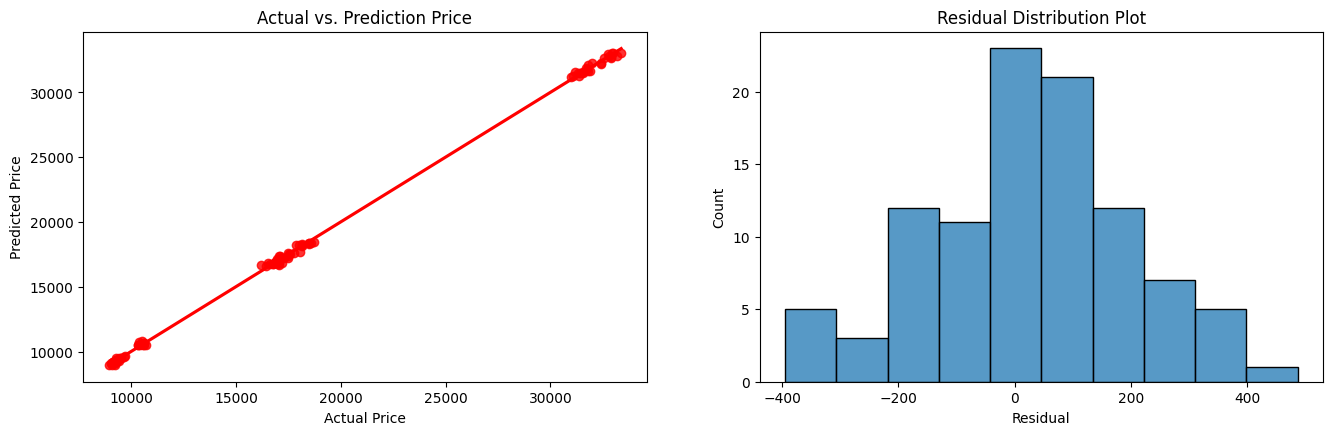

In [28]:
plt.figure(figsize=(16, 10))

plt.subplot(221)
sns.regplot(x=y_test, y=y_pred,color="red").set(title='Actual vs. Prediction Price', xlabel='Actual Price', ylabel='Predicted Price')
plt.subplot(222)
sns.histplot(m_lr['Residual']).set(title='Residual Distribution Plot')

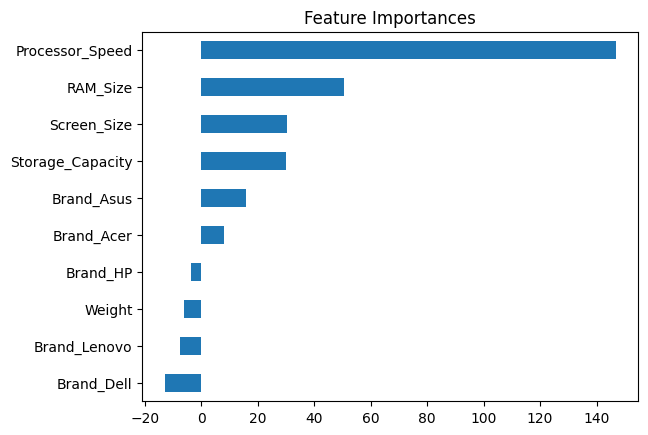

In [29]:
# Get coefficients (feature importances)
coefficients = lr.coef_

feature_imp = pd.Series(coefficients, index=X.columns).sort_values(ascending=True)
feature_imp.plot(kind='barh', title='Feature Importances')
plt.show()